<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [24]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [25]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [26]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("weight_height.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [27]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df.dropna(inplace=True)


In [28]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [29]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df1 = df.copy()
df1['sexo'] = df1['Gender'].replace({'Male'}, 'masculino').replace({'Female'}, 'femenino')
df1['altura_m'] = df1['Height']*0.0254
df1['peso_lb'] = df1['Weight']*0.453592

df1.head()

,Gender,Height,Weight,sexo,altura_m,peso_lb
0,Male,73.847017,241.893563,masculino,1.875714,109.720985
1,Male,68.781904,162.310473,masculino,1.747060,73.622732
2,Male,74.110105,212.740856,masculino,1.882397,96.497550
3,Male,71.730978,220.042470,masculino,1.821967,99.809504
4,Male,69.881796,206.349801,masculino,1.774998,93.598619


In [30]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
print(f'son: {df.shape[0]} filas y {df.shape[1]} columnas')

son: 10000 filas y 3 columnas


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

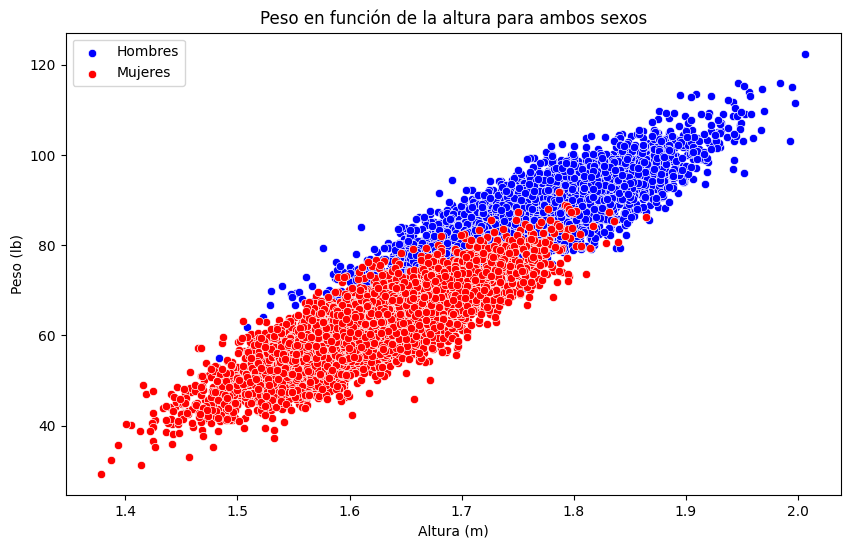

In [38]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
#Filtrar el dataframe por sexo
df_masculino = df1[df1['sexo'] == 'masculino']
df_femenino = df1[df1['sexo'] == 'femenino']

# Crear el scatter plot para ambos sexos en el mismo ax
plt.figure(figsize=(10, 6))

# Scatter plot para hombres
sns.scatterplot(x=df_masculino['altura_m'], y=df_masculino['peso_lb'], color='b', label='Hombres')

# Scatter plot para mujeres
sns.scatterplot(x=df_femenino['altura_m'], y=df_femenino['peso_lb'], color='r', label='Mujeres')

# Añadir título y etiquetas
plt.title('Peso en función de la altura para ambos sexos')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (lb)')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

El valor medio de la altura de los hombres es: 1.75 metros


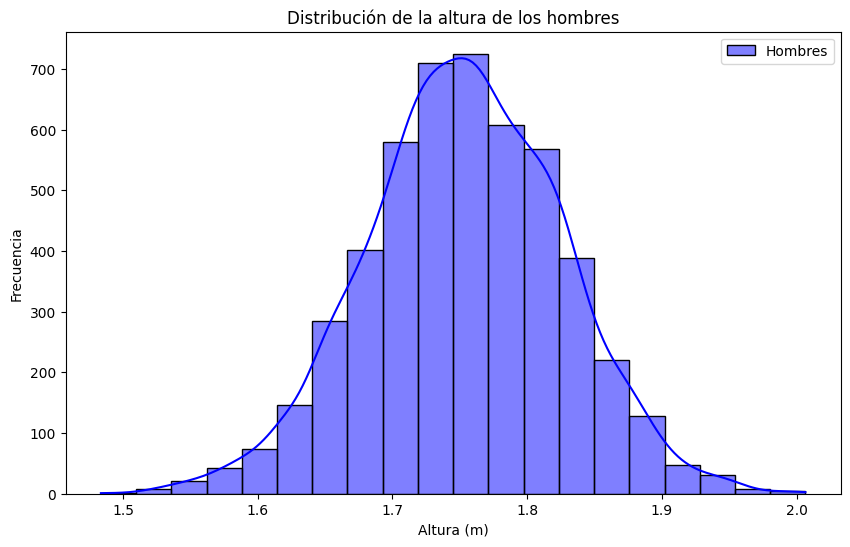

In [32]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
# Calcular el valor medio de la altura de los hombres
altura_media = df_masculino['altura_m'].mean()

# Imprimir el valor medio en pantalla
print(f'El valor medio de la altura de los hombres es: {altura_media:.2f} metros')

plt.figure(figsize=(10, 6))
sns.histplot(df_masculino['altura_m'], bins=20, kde=True, color='b', label='Hombres')
plt.title('Distribución de la altura de los hombres')
plt.xlabel('Altura (m)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

El valor medio de la altura de las mujeres es: 1.62 metros


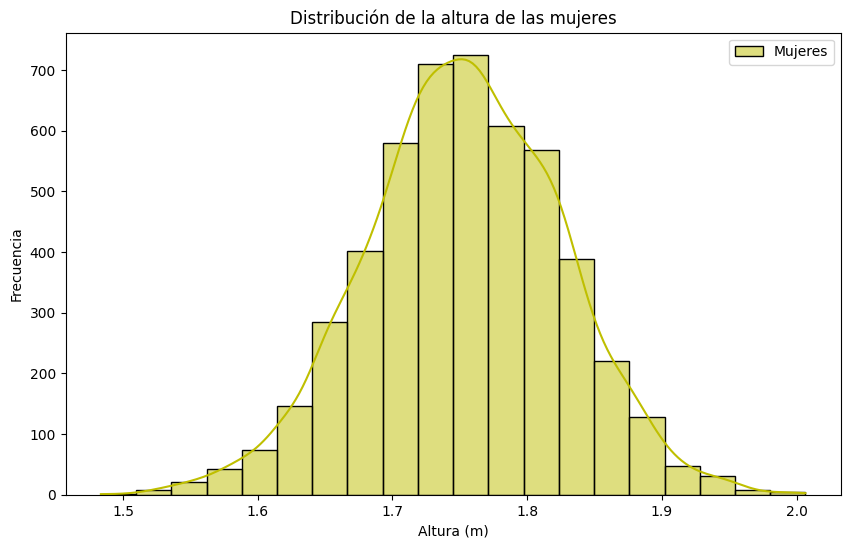

In [33]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
altura_media = df_femenino['altura_m'].mean()

# Imprimir el valor medio en pantalla
print(f'El valor medio de la altura de las mujeres es: {altura_media:.2f} metros')

plt.figure(figsize=(10, 6))
sns.histplot(df_masculino['altura_m'], bins=20, kde=True, color='y', label='Mujeres')
plt.title('Distribución de la altura de las mujeres')
plt.xlabel('Altura (m)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

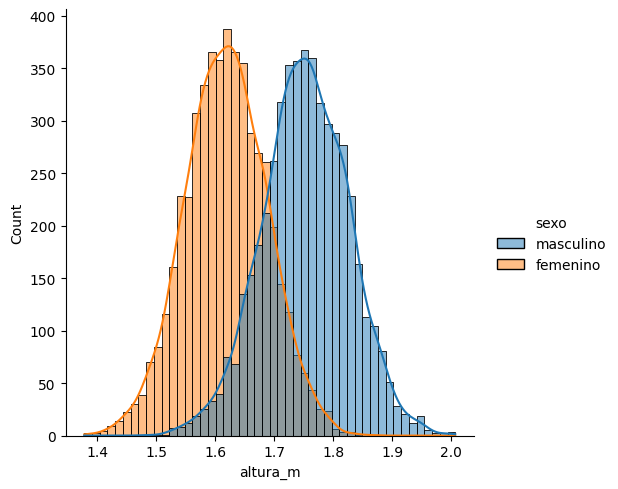

In [34]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
plt.figure(figsize=(10, 6))
sns.displot(data=df1, x="altura_m", hue="sexo", kde=True)

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

In [36]:
df1.head()

,Gender,Height,Weight,sexo,altura_m,peso_lb
0,Male,73.847017,241.893563,masculino,1.875714,109.720985
1,Male,68.781904,162.310473,masculino,1.747060,73.622732
2,Male,74.110105,212.740856,masculino,1.882397,96.497550
3,Male,71.730978,220.042470,masculino,1.821967,99.809504
4,Male,69.881796,206.349801,masculino,1.774998,93.598619


Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [43]:
X_femenino = df_femenino[['peso_lb']].values
y_femenino = df_femenino['altura_m'].values

X_masculino = df_masculino[['peso_lb']].values
y_masculino = df_masculino['altura_m'].values

from sklearn.model_selection import train_test_split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_femenino, y_femenino, test_size=0.3, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_masculino, y_masculino, test_size=0.3, random_state=42)


# Se importa la herramienta de sklearn.linear_model como LinearRegression
from sklearn.linear_model import LinearRegression

# Se crea el objeto lr a partir que significa Regresión lineal a partir de la clase LinearRegression()
lr_f = LinearRegression()
lr_m = LinearRegression()

# Del objeto lr se puede acceder al método fit con la notación del punto
# Necesita los valores de X haciendole un ajuste con reshape para que haga el entrenamiento junto a los
# valores de y
lr_f.fit(X_train_f, y_train_f)
lr_m.fit(X_train_m, y_train_m)
# Luego del objeto lr se puede acceder al método predict() que se encarga de hacer las precciones para cada
# valor de X
y_hat_f= lr_f.predict(X_test_f)
y_hat_m= lr_m.predict(X_test_m)


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [45]:
# Se importa la herramienta de sklearn.metrics como r2_score
from sklearn.metrics import r2_score

# En este caso, ya que se trata de una regresión lineal puedo relacinonar el
# índice R2 con el coeficiente de correlación lineal.
value_f = r2_score(y_test_f, y_hat_f)
print(f"Coeficiente de determinación: {value_f:.2f}")

value_m = r2_score(y_test_m, y_hat_m)
print(f"Coeficiente de determinación: {value_m:.2f}")

Coeficiente de determinación: 0.73
Coeficiente de determinación: 0.75


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

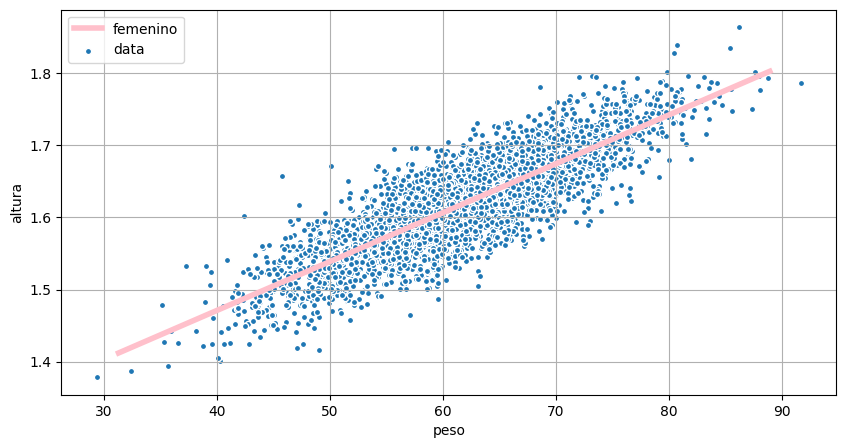

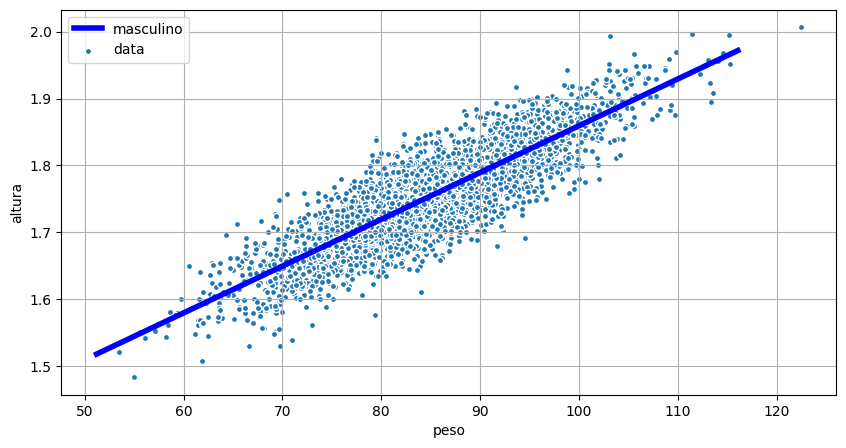

In [56]:
# Modelo de Regresión Lineal
lx = sorted(X_test_f)
ly = lr_f.predict(lx)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

ax.plot(lx, ly, label="femenino", color='pink', lw=4)
ax.scatter(X_train_f, y_train_f, edgecolor='white', s=20, label="data")
ax.set_xlabel("peso")
ax.set_ylabel("altura")
ax.legend()
ax.grid('dashed')
plt.show()

lx = sorted(X_test_m)
ly = lr_m.predict(lx)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

ax.plot(lx, ly, label="masculino", color='b', lw=4)
ax.scatter(X_train_m, y_train_m, edgecolor='w', s=20, label="data")
ax.set_xlabel("peso")
ax.set_ylabel("altura")
ax.legend()
ax.grid('dashed')
plt.show()